# import library

In [28]:
import cv2
import matplotlib.pyplot as plt # memvisualisasi data
import numpy as np # membaca angka

In [29]:
img = cv2.imread("uts pengcit.jpg")

In [30]:
img.shape # membuat variabel dalam baris dan kolom dalam shape citra

(962, 1600, 3)

In [31]:
[baris, kolom] = img.shape[:2]

In [32]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

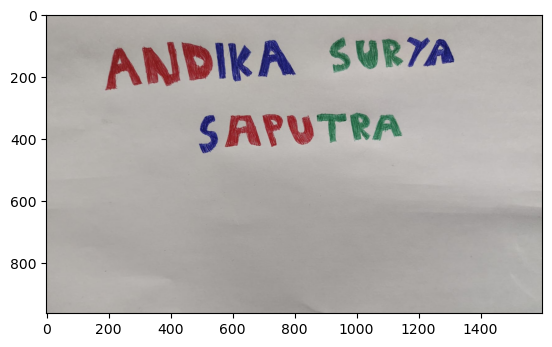

In [33]:
plt.imshow(img)

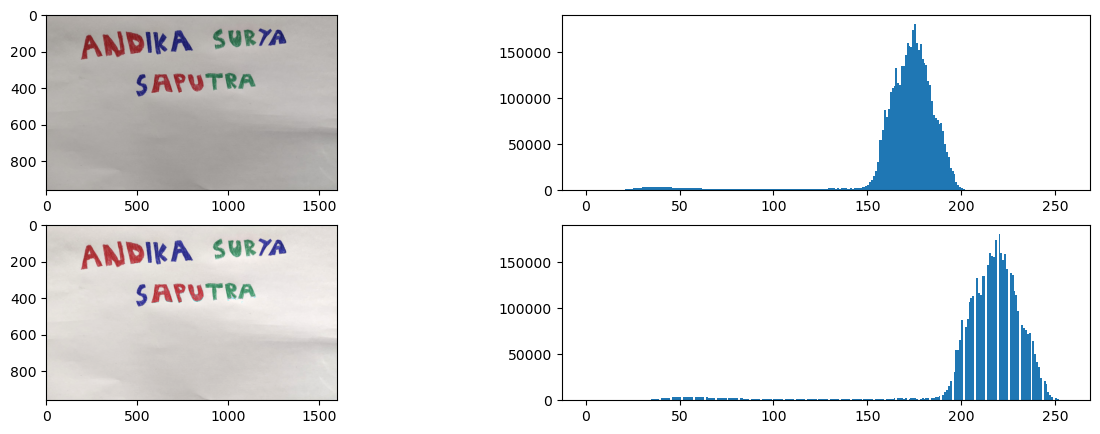

In [34]:
alpa = 1.2
beta = 10

citra = np.zeros((baris, kolom, 3))

for x in range (baris) :
    for y in range (kolom) :
        gcx = (img[x, y] * alpa) + beta
        citra[x, y] = gcx

citra = citra.astype(np.uint8)

# menampilkan
fig, axs = plt.subplots(2, 2, figsize = (15, 5))
axs[0, 0].imshow(img)
axs[0, 1].hist(img.ravel(), 256, [0, 256])
axs[1, 0].imshow(citra)
axs[1, 1].hist(citra.ravel(), 256, [0, 256])
plt.show()

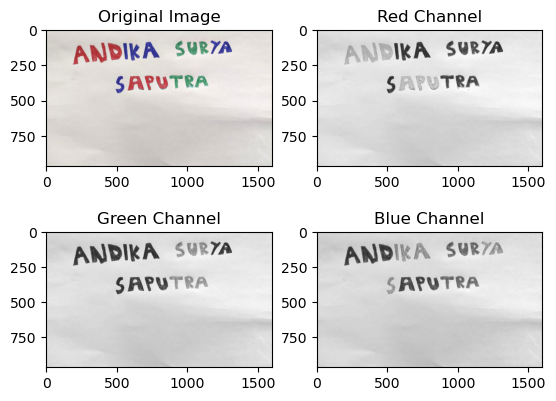

In [35]:
plt.subplot(2, 2, 1)
plt.imshow(citra)
plt.title('Original Image')

# Display the red channel
plt.subplot(2, 2, 2)
plt.imshow(citra[:,:,0], cmap="gray")
plt.title('Red Channel')

# Display the green channel
plt.subplot(2, 2, 3)
plt.imshow(citra[:,:,1], cmap="gray")
plt.title('Green Channel')

# Display the blue channel
plt.subplot(2, 2, 4)
plt.imshow(citra[:,:,2], cmap="gray")
plt.title('Blue Channel')

plt.show()

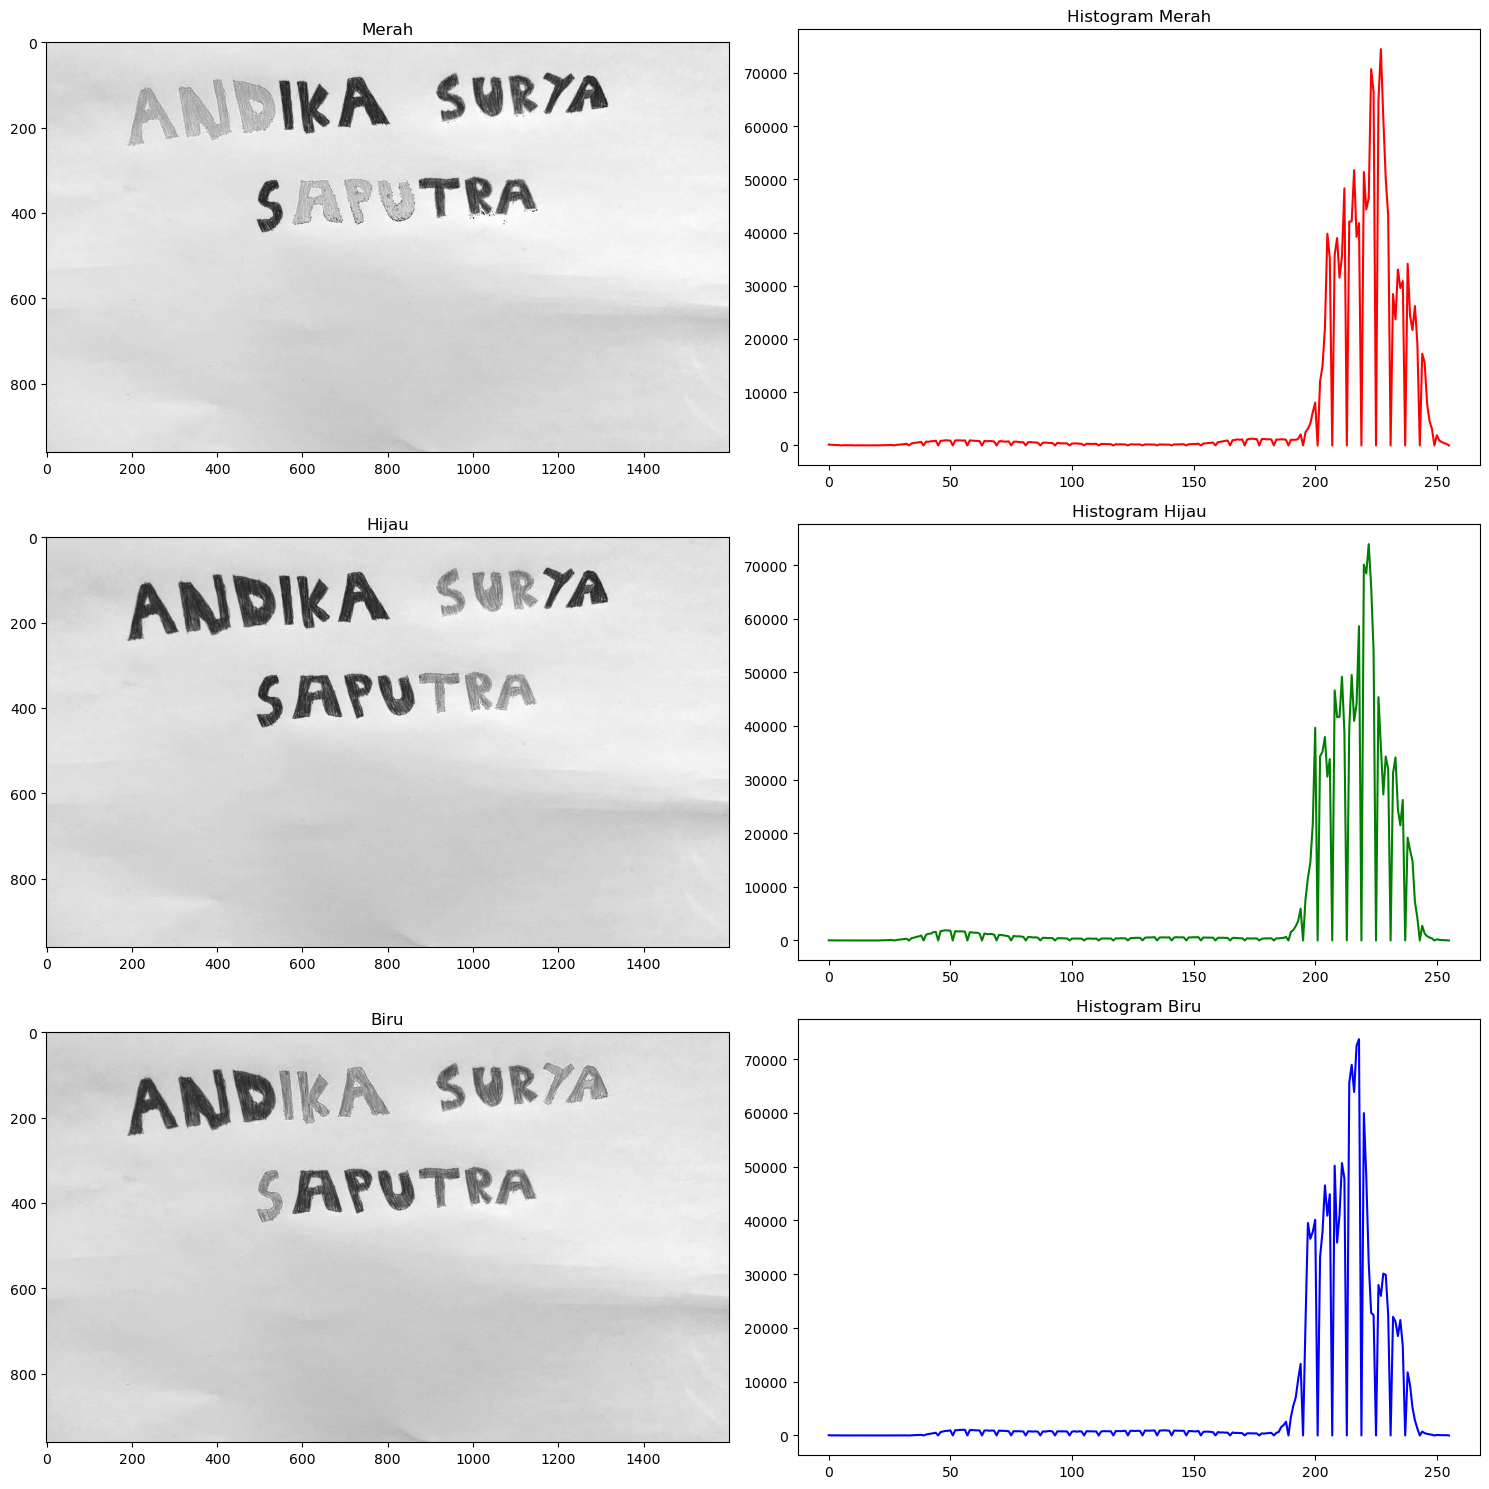

In [37]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Merah
merah = citra[:, :, 0]
hist_merah = cv2.calcHist([merah], [0], None, [256], [0, 256])
axs[0, 0].imshow(merah, cmap='gray')
axs[0, 0].set_title('Merah')
axs[0, 1].plot(hist_merah, color='r')
axs[0, 1].set_title('Histogram Merah')

# Hijau
hijau = citra[:, :, 1]
hist_hijau = cv2.calcHist([hijau], [0], None, [256], [0, 256])
axs[1, 0].imshow(hijau, cmap='gray')
axs[1, 0].set_title('Hijau')
axs[1, 1].plot(hist_hijau, color='g')
axs[1, 1].set_title('Histogram Hijau')

# Biru
biru = citra[:, :, 2]
hist_biru = cv2.calcHist([biru], [0], None, [256], [0, 256])
axs[2, 0].imshow(biru, cmap='gray')
axs[2, 0].set_title('Biru')
axs[2, 1].plot(hist_biru, color='b')
axs[2, 1].set_title('Histogram Biru')

plt.tight_layout()
plt.show()

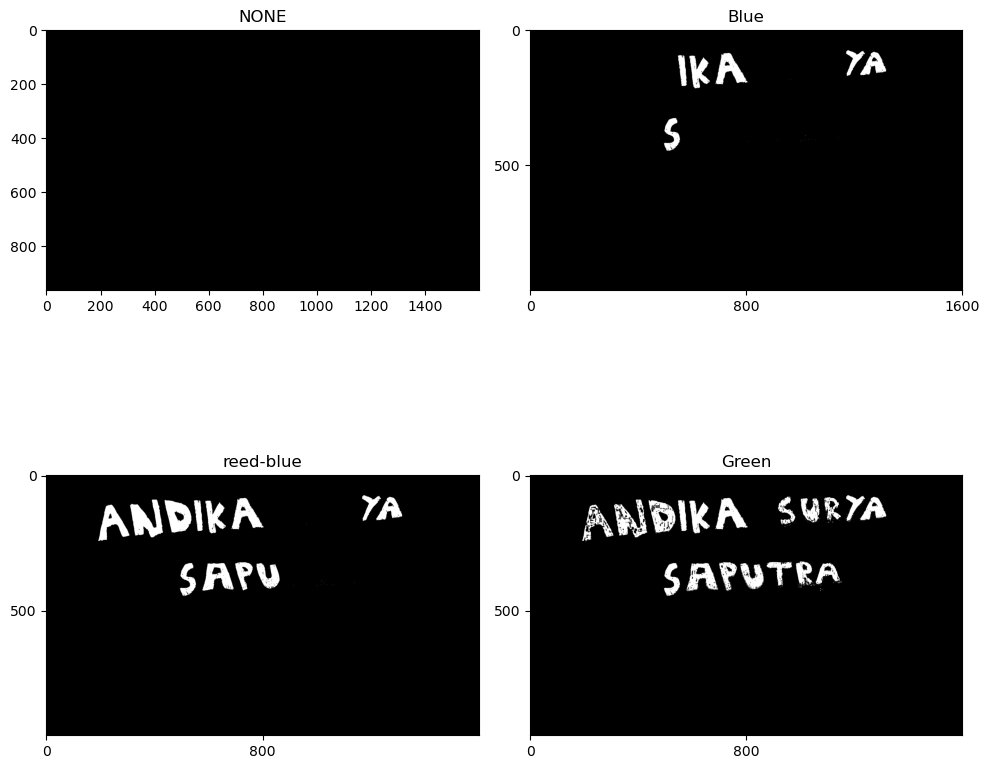

In [38]:
# Konversi citra ke dalam ruang warna HSV
hsv_image = cv2.cvtColor(citra_gabungan, cv2.COLOR_RGB2HSV)

# Definisikan rentang warna untuk setiap warna
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# Gunakan ambang batas untuk warna hijau yang telah Anda temukan
lower_green = np.array([20, 100, 100])
upper_green = np.array([250, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Deteksi warna biru
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
# Deteksi warna hijau
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
# Deteksi warna merah
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Plot hasil

#gambar 1
gray = cv2.cvtColor(citra_gabungan, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

#gambar 2
plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')

#gambar 3
plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('reed-blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#gambar 4
plt.subplot(2, 2, 4)
plt.imshow(mask_green, cmap='gray')
plt.title('Green')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

#menampilkan output
plt.tight_layout()
plt.show()